In [1]:
import pandas as pd


purchase_df = pd.read_csv("/content/purchase_behaviour.csv")
transaction_df = pd.read_csv("/content/transaction_data.csv")


print(purchase_df.head())
print(transaction_df.head())


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [8]:
print(purchase_df.isnull().sum())
print(transaction_df.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [9]:
print(transaction_df.describe())
print(purchase_df.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

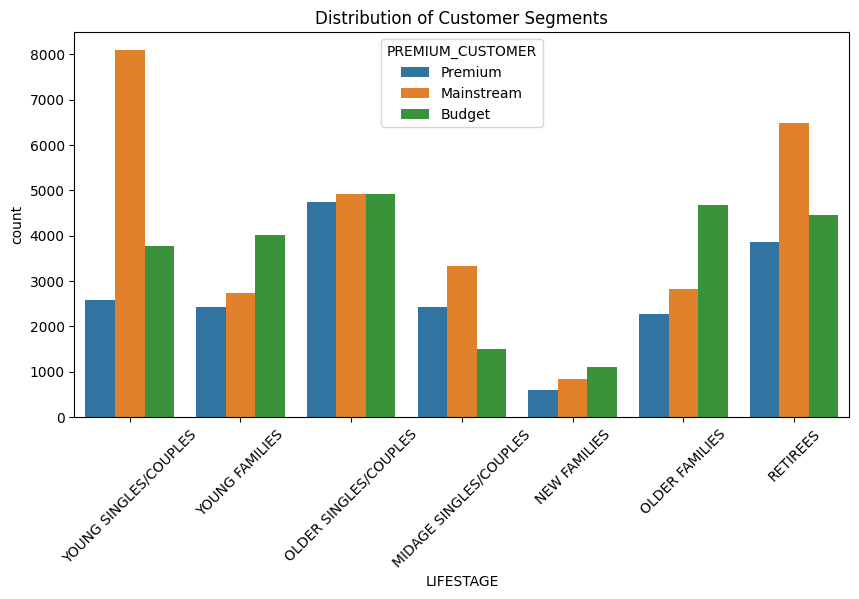

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=purchase_df, x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
plt.title("Distribution of Customer Segments")
plt.xticks(rotation=45)
plt.show()

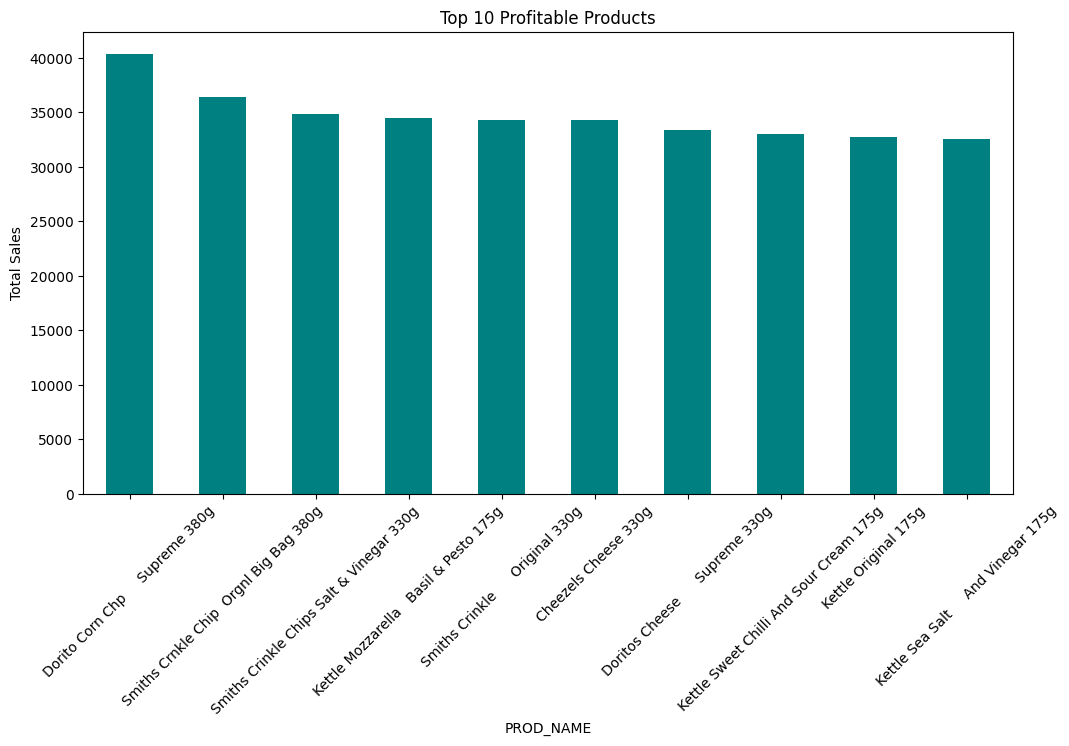

In [11]:
top_products = transaction_df.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Profitable Products")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [2]:
top_products = (
    transaction_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(top_products)


PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [3]:
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")



In [5]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [6]:
loyal_customers = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(loyal_customers)


LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              168363.25
YOUNG SINGLES/COUPLES  Mainstream          157621.60
RETIREES               Mainstream          155677.05
Name: TOT_SALES, dtype: float64


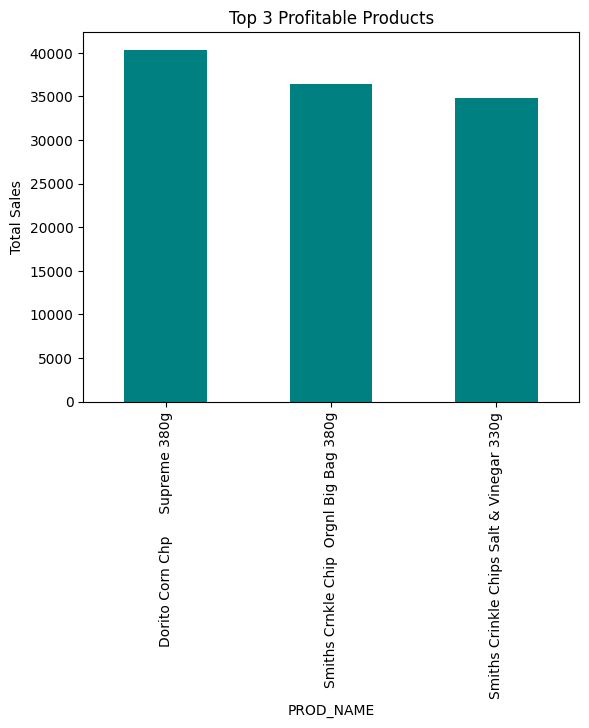

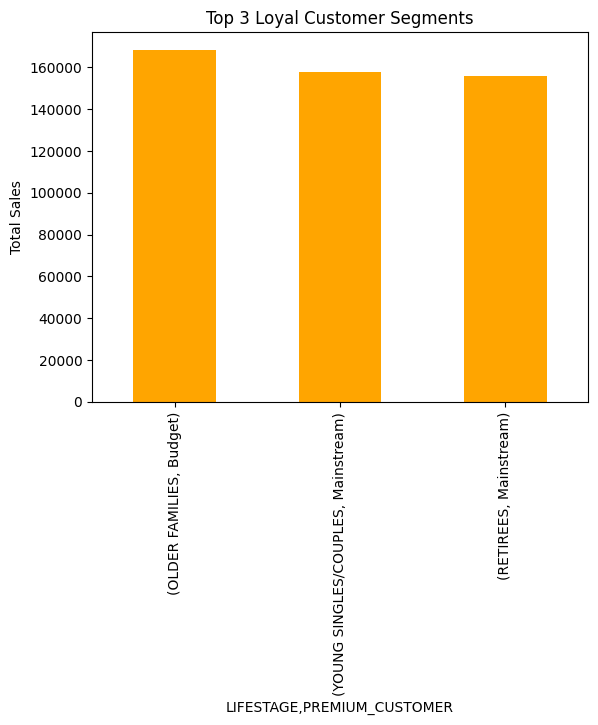

In [7]:
import matplotlib.pyplot as plt


top_products.plot(kind='bar', color='teal', title="Top 3 Profitable Products")
plt.ylabel("Total Sales")
plt.show()


loyal_customers.plot(kind='bar', color='orange', title="Top 3 Loyal Customer Segments")
plt.ylabel("Total Sales")
plt.show()


The bar charts show:

Top 3 Profitable Products
– The highest revenue-generating products.
Top 3 Loyal Customer Segments
 – The customer groups contributing the most to sales.
These insights can guide marketing strategies, such as targeted promotions for older families (budget buyers) and mainstream young singles/couples.